# How news impacts Netflix' stock price

In this notebook we
- explore how news impacts the stock price of Netflix
- fetch pricing data from the Yahoo Finance API
- fetch news articles related to Netflix from the newsfilter.io API
- visualise price and news volume over time to identify potential relationships between both

# Boilterplate

Let's fetch some news first.

In [1]:
# Package used to execute HTTP POST request to the API
import json
import urllib.request
%matplotlib inline

# API endpoint
API = "https://api.newsfilter.io/public/actions"

# Define the filter parameters
queryString = "(title:\"Netflix\" OR description:\"Netflix\" OR symbols:NFLX) AND publishedAt:[2019-06-01 TO 2019-08-26]"

payload = {
    "type": "filterArticles",
    "queryString": queryString,
    "size": 10000
}

# Format your payload to JSON bytes
jsondata = json.dumps(payload)
jsondataasbytes = jsondata.encode('utf-8')   # needs to be bytes

# Instantiate the request 
req = urllib.request.Request(API)

# Set the correct HTTP header: Content-Type = application/json
req.add_header('Content-Type', 'application/json; charset=utf-8')
# Set the correct length of your request
req.add_header('Content-Length', len(jsondataasbytes))

# Send the request to the API
response = urllib.request.urlopen(req, jsondataasbytes)

# Read the response 
res_body = response.read()
# Transform the response into JSON
articles = json.loads(res_body.decode("utf-8"))

In [2]:
# Let's see how many articles we got
print(articles['total'])

# Uncomment the line below to inspect news articles
# print(json.dumps(articles, indent=2))

732


In [3]:
# Import yfinance to access historical price data
# pandas_datareader didn't work for me
import yfinance as yf

In [4]:
# Download Open, High, Low, Close, Adjusted Close and Volume from Yahoo Finance 
quotes = yf.download("NFLX", start="2019-06-01", end="2019-08-26")

[*********************100%***********************]  1 of 1 downloaded


In [5]:
quotes

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-31,347.22,349.34,342.92,343.28,343.28,5023400
2019-06-03,343.56,347.66,332.65,336.63,336.63,7849600
2019-06-04,345.00,353.61,343.25,353.40,353.40,7891600
2019-06-05,354.38,357.88,348.71,355.73,355.73,5020100
2019-06-06,354.84,358.21,352.09,357.13,357.13,3710000
2019-06-07,357.39,365.15,355.69,360.87,360.87,4777300
2019-06-10,363.65,367.10,349.29,352.01,352.01,7810300
2019-06-11,355.00,357.58,348.50,351.27,351.27,5396700
2019-06-12,351.82,353.61,343.23,345.56,345.56,4584700


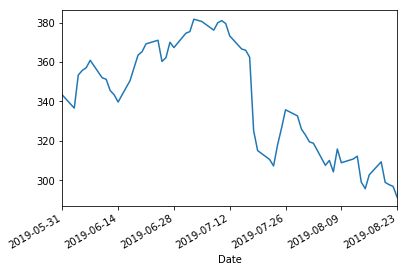

In [6]:
# Quick check to see if everything worked out
# We use Adjusted Close instead of Close to ensure that
# stock splits don't impact our results
quotes['Adj Close'].plot();

In [7]:
# Generate bins used for bar chart plotting. 
# Each bin represents one day and news volume of this day.
def get_bins (articles):
    bins = {}
    for article in articles:
        publishedAt = dateutil.parser.parse(article['publishedAt']).strftime('%Y-%m-%d')
        bins[publishedAt] = bins[publishedAt] + 1 if publishedAt in bins else 1
    return bins

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser

# Seaborn plot style
plt.style.use('seaborn')

bins = get_bins(articles['articles'])

# Make sure that a bin exists for each day we have price data
for date in quotes.index:
    index = date.strftime('%Y-%m-%d')
    bins[index] = bins[index] if index in bins else 0

# Transform bins dict into dataframe      
bins = pd.DataFrame.from_dict(bins, orient='index', columns=['News Volume'])

# Revert index to match quotes dataframe
bins = bins.iloc[::-1]

# Merge bins and quotes into single dataframe
merged = pd.concat([quotes, bins], join='outer', axis=1).reindex(quotes.index)
merged

,Open,High,Low,Close,Adj Close,Volume,News Volume
Date,,,,,,,
2019-05-31,347.22,349.34,342.92,343.28,343.28,5023400.0,0
2019-06-03,343.56,347.66,332.65,336.63,336.63,7849600.0,8
2019-06-04,345.00,353.61,343.25,353.40,353.40,7891600.0,5
2019-06-05,354.38,357.88,348.71,355.73,355.73,5020100.0,5
2019-06-06,354.84,358.21,352.09,357.13,357.13,3710000.0,8
2019-06-07,357.39,365.15,355.69,360.87,360.87,4777300.0,10
2019-06-10,363.65,367.10,349.29,352.01,352.01,7810300.0,6
2019-06-11,355.00,357.58,348.50,351.27,351.27,5396700.0,8
2019-06-12,351.82,353.61,343.23,345.56,345.56,4584700.0,6


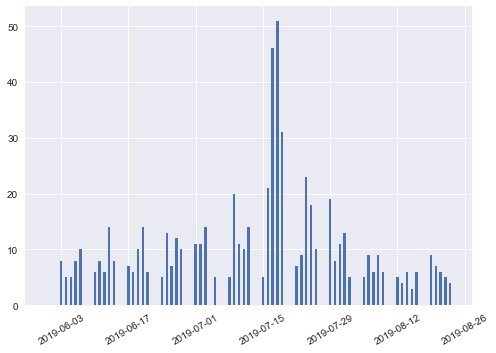

In [9]:
# Let's inspect the news volume
plt.bar(merged.index, merged['News Volume'], width=0.5)
plt.setp(plt.gca().get_xticklabels(), rotation = 30)
plt.show()

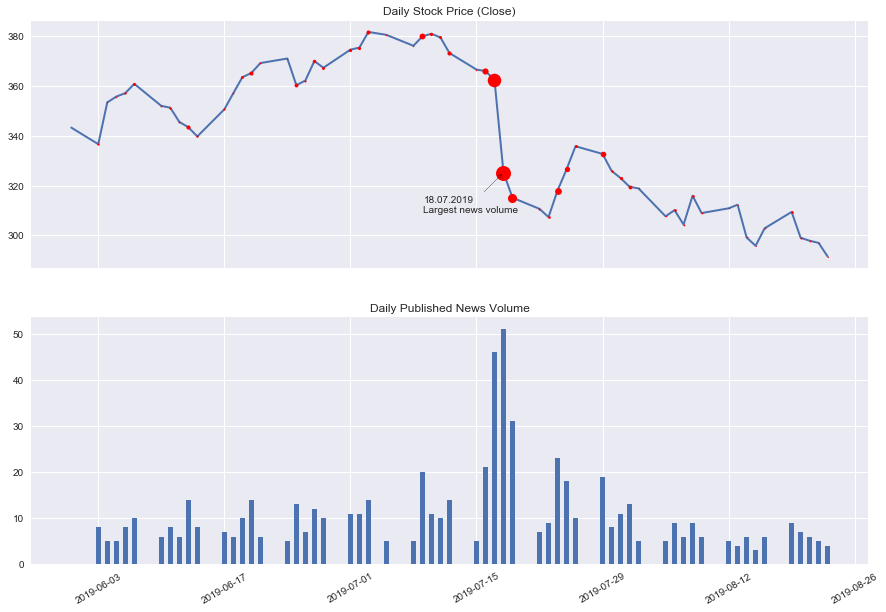

In [10]:
# Set figure size
plt.rcParams['figure.figsize'] = [15, 10]

fig, (ax1, ax2) = plt.subplots(2, sharex=True)

# Draw price time series
ax1.set_title('Daily Stock Price (Close)')
ax1.xaxis_date()
ax1.plot(merged.index, merged['Adj Close'], lw=2)
ax1.grid(True)

max_news_volume = merged['News Volume'].max()

# Draw markers onto price time series. Marker size correlates to news volume.
for index, row in merged.iterrows():
    markersize = (row['News Volume'] / max_news_volume) * 15
    ax1.plot([index], [row['Adj Close']], marker='o', color='red', markersize=markersize)
    # Overlay arrow pointer at largest news volume 
    if row['News Volume'] == max_news_volume:
        ax1.annotate(index.strftime('%d.%m.%Y') + '\nLargest news volume',
            xy=(index, row['Adj Close']), xycoords='data',
            xytext=(-80, - 40), textcoords='offset pixels',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3")
            )

# Draw news volume bar chart    
ax2.set_title('Daily Published News Volume')
ax2.bar(merged.index, merged['News Volume'], width=0.5)
ax2.grid(True)
ax2.autoscale_view()
        
plt.setp(plt.gca().get_xticklabels(), rotation = 30)
plt.show()

In [11]:
# Let's see what articles were published mid July 
from datetime import datetime, timezone, date

for article in articles['articles']:    
    publishedAt = dateutil.parser.parse(article['publishedAt'])
    start = datetime(2019, 7, 17, tzinfo=timezone.utc)
    end = datetime(2019, 7, 19, tzinfo=timezone.utc)
    if publishedAt > start and publishedAt < end:
        print(publishedAt)
        print(article['title'])

2019-07-18 22:26:38+00:00
'Our legal department is here, it's queer, and it's telling you to steer clear' — Netflix orders Boston's Straight Pride to stop listing it as a 'prospective corporate sponsor' (NFLX)
2019-07-18 17:42:00-04:00
Netflix sinks on subscriber losses, analysts still see growth
2019-07-18 21:20:30+00:00
Netflix's slump last quarter could be 'great news' for subscribers who hate price increases (NFLX)
2019-07-18 21:20:00+00:00
‘Stadia Pro is not Netflix for Games,’ and other tidbits from Stadia AMA - 9to5Google
2019-07-18 20:37:51+00:00
Stadia Pro Isn’t a Netflix for Games, to Offer One Free Game a Month - Game Rant
2019-07-18 17:48:00+00:00
Netflix retains buy ratings despite subscriber shock - The Australian Financial Review
2019-07-18 17:30:57+00:00
Daily Crunch: Netflix has a rough quarter
2019-07-18 17:29:11+00:00
Netflix is the new LaCroix — and they tell the same cautionary tale about business strategy
2019-07-18 12:55:11-04:00
Netflix crash: Beware of hot stoc